In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Path ke dataset di Google Drive
DATASET_PATH = "/content/drive/My Drive/Air-quality-dataset/clean_df_all.csv"

In [5]:
# Load dataset
df = pd.read_csv(DATASET_PATH)
df['date_time'] = pd.to_datetime(df['date_time'])

In [6]:
# Exploratory Data Analysis (EDA)
## Menampilkan informasi dasar dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   No               14606 non-null  int64         
 1   year             14606 non-null  int64         
 2   month            14606 non-null  int64         
 3   day              14606 non-null  int64         
 4   hour             14606 non-null  int64         
 5   PM2.5            14606 non-null  float64       
 6   PM10             14606 non-null  float64       
 7   SO2              14606 non-null  float64       
 8   NO2              14606 non-null  float64       
 9   CO               14606 non-null  int64         
 10  O3               14606 non-null  float64       
 11  TEMP             14606 non-null  float64       
 12  PRES             14606 non-null  float64       
 13  DEWP             14606 non-null  float64       
 14  RAIN             14606 non-null  float

In [7]:
## Menampilkan statistik deskriptif
print(df.describe())

                 No          year         month           day          hour  \
count  14606.000000  14606.000000  14606.000000  14606.000000  14606.000000   
mean   18259.644940   2014.677187      7.355470     15.445433     11.319732   
min      268.000000   2013.000000      1.000000      1.000000      0.000000   
25%    10986.000000   2014.000000      6.000000      7.000000      5.000000   
50%    20820.000000   2015.000000      7.000000     16.000000     11.000000   
75%    25891.000000   2016.000000      9.000000     22.000000     18.000000   
max    34899.000000   2017.000000     12.000000     31.000000     23.000000   
std     9738.278653      1.073758      2.426212      8.740044      7.226775   

              PM2.5          PM10           SO2           NO2           CO  \
count  14606.000000  14606.000000  14606.000000  14606.000000  14606.00000   
mean      61.992873     70.144646      5.395090     38.009244   1115.09455   
min        3.000000      2.000000      1.000000      2

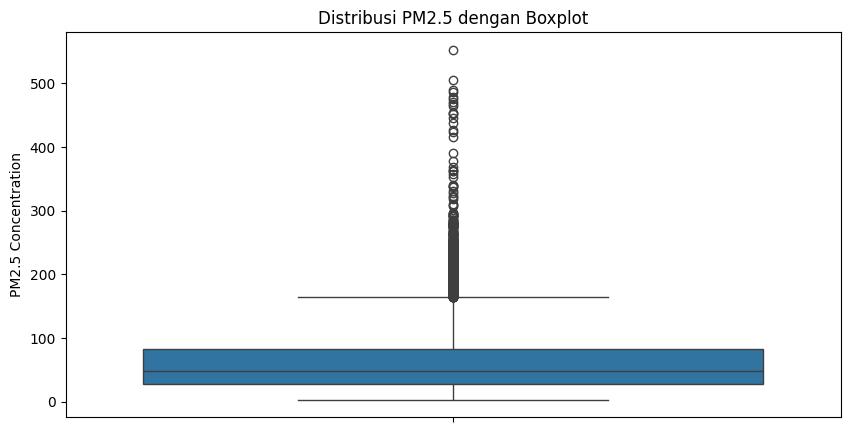

In [8]:
## Boxplot untuk mendeteksi outlier dalam PM2.5
plt.figure(figsize=(10, 5))
sns.boxplot(y=df["PM2.5"])
plt.title("Distribusi PM2.5 dengan Boxplot")
plt.ylabel("PM2.5 Concentration")
plt.show()

In [9]:
# Menjawab Pertanyaan dengan Agregasi
## 1. Pengaruh Kecepatan Angin terhadap PM2.5 di Musim Panas
df['month'] = df['date_time'].dt.month
df_summer = df[df['month'].isin([6, 7, 8])]

In [10]:
# Agregasi berdasarkan bulan
summer_agg = df_summer.groupby('month')[['WSPM', 'PM2.5']].mean().reset_index()
print(summer_agg)

   month      WSPM      PM2.5
0      6  1.590251  65.183380
1      7  1.378669  56.100403
2      8  1.419054  55.574744


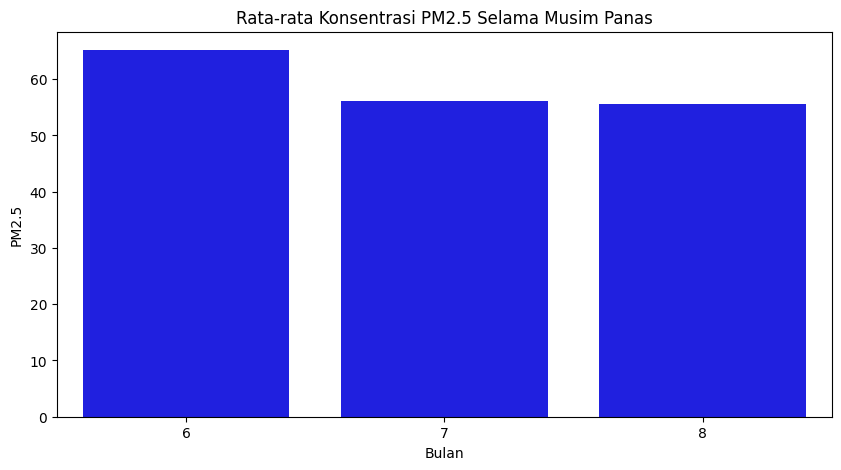

In [11]:
# Visualisasi dengan bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=summer_agg['month'], y=summer_agg['PM2.5'], color="blue")
plt.title("Rata-rata Konsentrasi PM2.5 Selama Musim Panas")
plt.xlabel("Bulan")
plt.ylabel("PM2.5")
plt.show()

In [12]:
## 2. Hubungan NO2 dan CO dengan Kualitas Udara
pollutant_agg = df.groupby('date_time').agg({'NO2': 'mean', 'CO': 'mean', 'PM2.5': 'mean'}).reset_index()

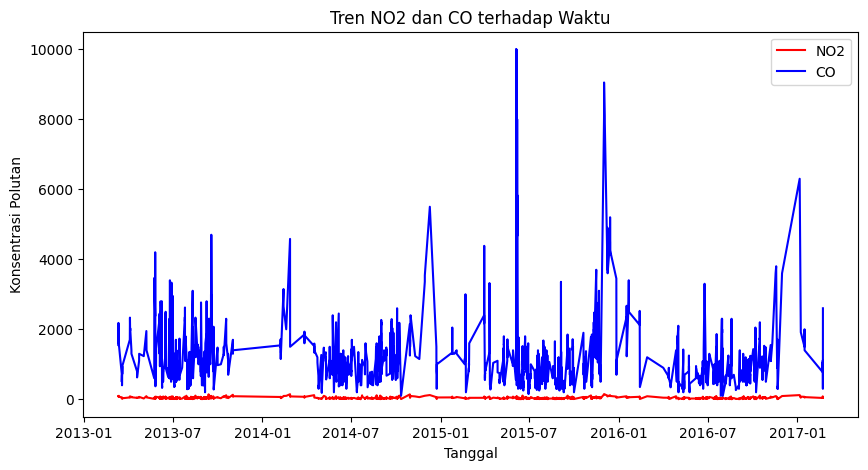

In [13]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=pollutant_agg['date_time'], y=pollutant_agg['NO2'], label="NO2", color='red')
sns.lineplot(x=pollutant_agg['date_time'], y=pollutant_agg['CO'], label="CO", color='blue')
plt.title("Tren NO2 dan CO terhadap Waktu")
plt.xlabel("Tanggal")
plt.ylabel("Konsentrasi Polutan")
plt.legend()
plt.show()

In [14]:
## 3. Pengaruh Hujan terhadap Polutan PM2.5
df['RAIN_GROUP'] = pd.cut(df['RAIN'], bins=[0, 1, 4, 8, 10], labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

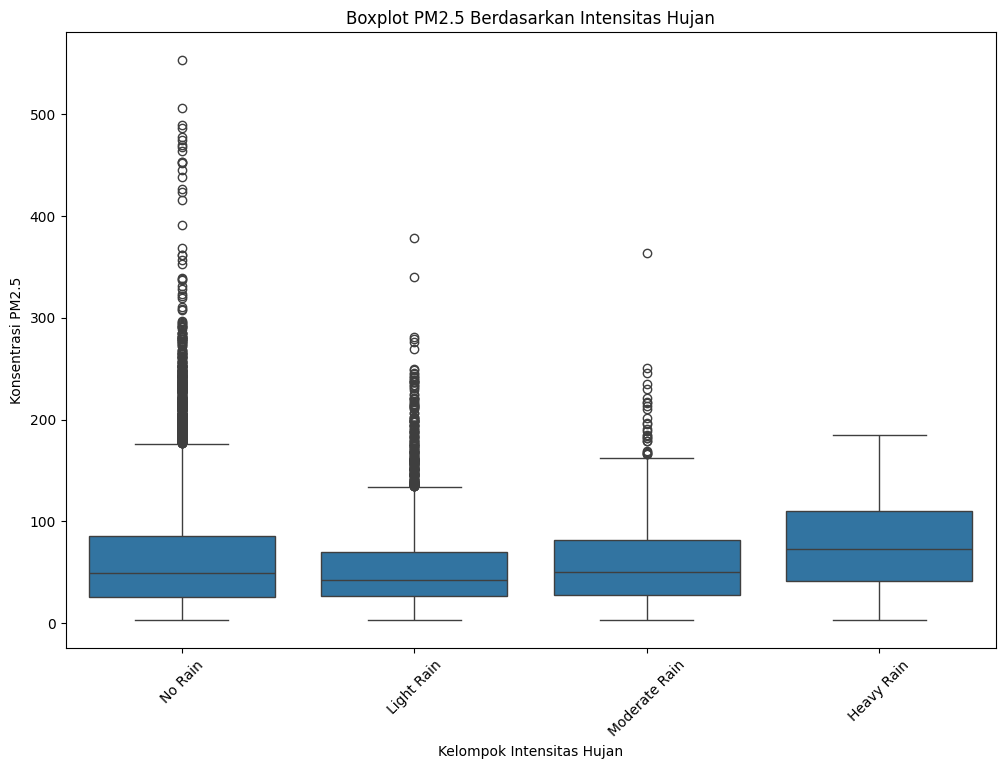

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='RAIN_GROUP', y='PM2.5', data=df)
plt.title('Boxplot PM2.5 Berdasarkan Intensitas Hujan')
plt.xlabel("Kelompok Intensitas Hujan")
plt.ylabel("Konsentrasi PM2.5")
plt.xticks(rotation=45)
plt.show()

In [16]:
## 4. Hubungan antara Konsentrasi NO2, CO dengan Pembentukan O3
monthly_avg = df.groupby(df['date_time'].dt.to_period('M')).agg({'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'}).reset_index()
monthly_avg['date_time'] = monthly_avg['date_time'].dt.to_timestamp()


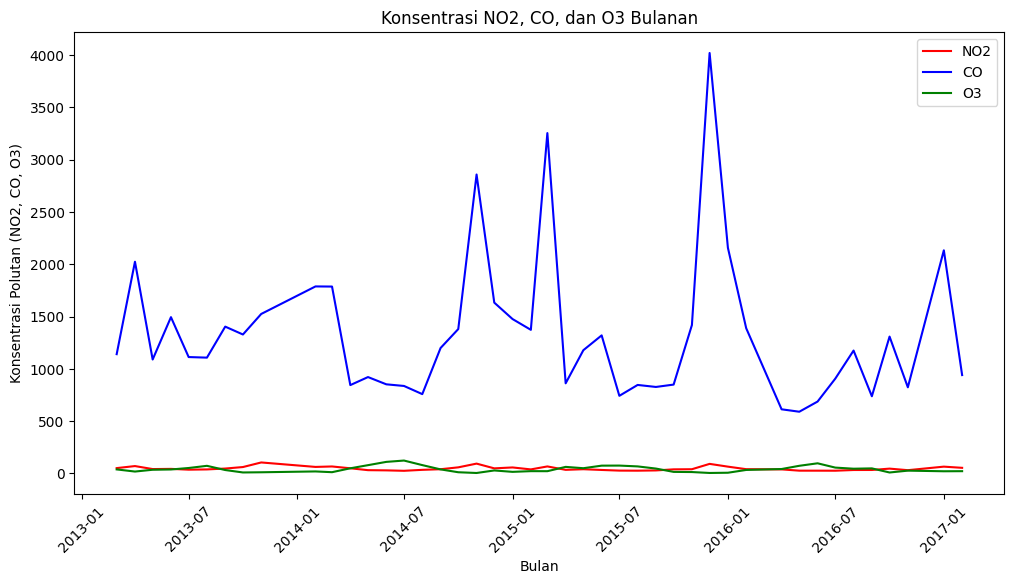

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_time', y='NO2', data=monthly_avg, label='NO2', color='red')
sns.lineplot(x='date_time', y='CO', data=monthly_avg, label='CO', color='blue')
sns.lineplot(x='date_time', y='O3', data=monthly_avg, label='O3', color='green')
plt.title('Konsentrasi NO2, CO, dan O3 Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi Polutan (NO2, CO, O3)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

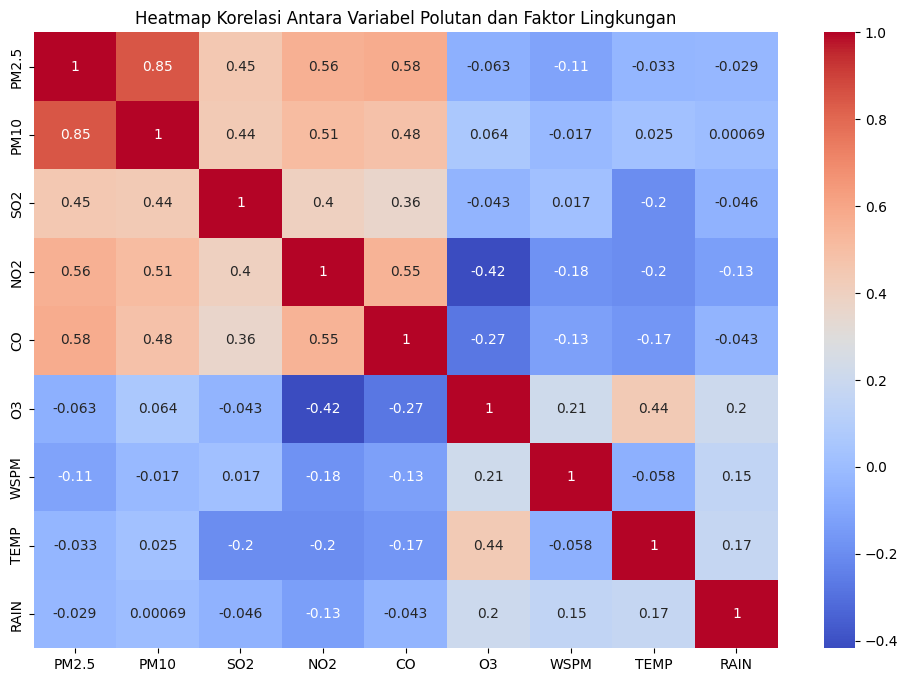

In [18]:
# Korelasi antar Polutan dan Faktor Lingkungan
corr_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'WSPM', 'TEMP', 'RAIN']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Antara Variabel Polutan dan Faktor Lingkungan')
plt.show()

In [19]:
# Kesimpulan
print("\n\nDari analisis di atas, dapat disimpulkan bahwa:\n")
print("1. Kecepatan angin berperan dalam penyebaran PM2.5, angin tinggi menurunkan konsentrasi PM2.5.")
print("2. Peningkatan NO2 dan CO berkaitan dengan aktivitas kendaraan bermotor.")
print("3. Hujan membantu mengurangi polusi udara, tetapi hujan lebat bisa meningkatkan polutan sementara.")
print("4. Konsentrasi NO2 dan CO mempengaruhi pembentukan O3 di atmosfer.")



Dari analisis di atas, dapat disimpulkan bahwa:

1. Kecepatan angin berperan dalam penyebaran PM2.5, angin tinggi menurunkan konsentrasi PM2.5.
2. Peningkatan NO2 dan CO berkaitan dengan aktivitas kendaraan bermotor.
3. Hujan membantu mengurangi polusi udara, tetapi hujan lebat bisa meningkatkan polutan sementara.
4. Konsentrasi NO2 dan CO mempengaruhi pembentukan O3 di atmosfer.
